# Exercise 1

In this exercise, we will continue practicing neural networks and data preprocessing for them.

### Exercise 1(a) (2 points)

Load the below libraries.

```
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, train_test_split

import tensorflow as tf
```

In [8]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import KFold, train_test_split

import tensorflow as tf

### Exercise 1(b) (2 points)

Read the `insurance.csv` data file and create a data frame called `insurance`.

In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exercise 1(c) (3 points)

Create a histogram of `charges`. Describe the chart.

Text(0.5, 1.0, 'Distribution of Charges')

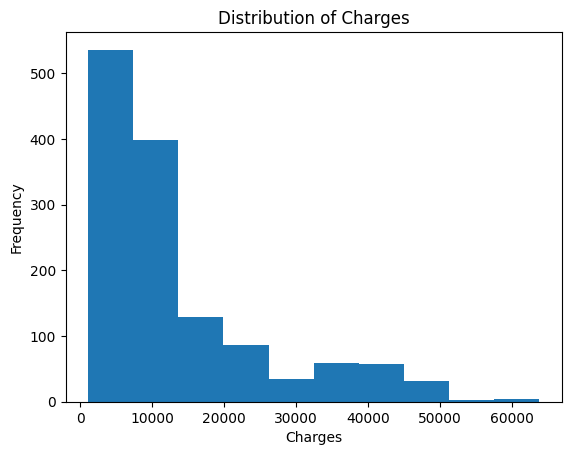

In [13]:
import matplotlib.pyplot as plt

plt.hist('charges', data= insurance)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

charges are right skewed

### Exercise 1(d) (5 points)

Using `pd.get_dummies`, convert `smoker`, `region`, and `sex` into 0-1 features.

In [14]:
dummies = pd.get_dummies(insurance[['sex','smoker','region']], dtype=int, drop_first=True)
dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


### Exercise 1(e) (5 points)

Define `age`, `bmi`, `children`, and the 0-1 features from part 1(d) as the input featues, and `charges` as the target feature.

In [15]:
insurance = pd.concat([insurance, dummies], axis=1)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [16]:
insurance = insurance.drop(columns=['sex', 'region', 'smoker'], axis=1)
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Exercise 1(f) (3 points)

Split the data into `train` (80%) and `text` (20%).

In [18]:
x = insurance.drop(columns=['charges'], axis=1)
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Exercise 1(g) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanSquaredError'`.
- Build the model on the `train` data, with `epochs=20` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [19]:
md_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (8,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

md_1.fit(x_train, y_train, epochs=20, validation_split=.1)

c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 320610880.0000 - val_loss: 285543840.0000
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308874368.0000 - val_loss: 285543840.0000
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299488704.0000 - val_loss: 285543840.0000
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301435776.0000 - val_loss: 285543840.0000
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314964960.0000 - val_loss: 285543840.0000
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331612736.0000 - val_loss: 285543840.0000
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308906816.0000 - val_loss: 285543840.0000
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 342985568.0000 - val_loss: 285543840.0000
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 341457728.0000 - val_loss: 285543840.0000
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337661024.0000 - val_loss: 285543840.0000

In [21]:
MSE = md_1.evaluate(x_test, y_test)
print(f'MSE:{MSE}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 343206464.0000
MSE:337772096.0


### Exercise 1(h) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function. Make sure to include `BatchNormalization()`
before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanSquaredError'`.
- Build the model on the `train` data, with `epochs=20` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [22]:
md_2 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, input_shape = (8,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

md_2.fit(x_train, y_train, epochs=20, validation_split=.1)

Epoch 1/20


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 264516352.0000 - val_loss: 700350144.0000
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58053920.0000 - val_loss: 567165248.0000
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43913060.0000 - val_loss: 167063968.0000
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41878580.0000 - val_loss: 222645808.0000
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45603640.0000 - val_loss: 58937248.0000
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44138960.0000 - val_loss: 39082104.0000
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40929940.0000 - val_loss: 33260170.0000
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43513712.0000 - val_loss: 34227464.0000
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37442328.0000 - val_loss: 29334454.0000
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46280312.0000 - val_loss: 23552960.0000
Epoch 11/20
31/31 ━━━━━━━

In [23]:
MSE = md_2.evaluate(x_test, y_test)
print(f'MSE:{MSE}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25448156.0000 
MSE:30260140.0


### Exercise 1(i) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function. Make sure to scale the inputs to 0-1 before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanSquaredError'`.
- Build the model on the `train` data, with `epochs=20` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [26]:
def min_max_scaler(x):
    min_val = tf.reduce_min(x,axis=0,keepdims=True)
    max_val = tf.reduce_max(x,axis=0,keepdims=True)
    return (x-min_val) / (max_val-min_val + tf.keras.backend.epsilon())

md_3 = tf.keras.Sequential([
    tf.keras.layers.Lambda(min_max_scaler),
    tf.keras.layers.Dense(16, input_shape = (8,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

md_3.fit(x_train, y_train, epochs=20, validation_split=.1)

Epoch 1/20



c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 297402592.0000 - val_loss: 136229264.0000
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139956432.0000 - val_loss: 78959184.0000
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84742032.0000 - val_loss: 49792396.0000
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56002440.0000 - val_loss: 34300176.0000
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38241344.0000 - val_loss: 30987304.0000
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37878308.0000 - val_loss: 29345146.0000
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33472136.0000 - val_loss: 29291098.0000
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36778840.0000 - val_loss: 30753458.0000
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40057328.0000 - val_loss: 29807492.0000
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38394664.0000 - val_loss: 28215030.0000
Epoch 11/20
31/31 ━━━━━━━━

In [27]:
MSE = md_3.evaluate(x_test, y_test)
print(f'MSE:{MSE}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 306667104.0000
MSE:301652128.0
